In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#import seaborn as sns
import torch
from torch.utils.data import Dataset, DataLoader
import os

In [2]:
paths = [r'E:\Thesis\outputs\43772_s2\quickview\gpu_monitoring.csv',
         r'E:\Thesis\outputs\43829_siam18\quickview\gpu_monitoring.csv',
         r'E:\Thesis\outputs\43771_siam33\quickview\gpu_monitoring.csv',
         r'E:\Thesis\outputs\43775_siam48\quickview\gpu_monitoring.csv',
         r'E:\Thesis\outputs\43776_siam96\quickview\gpu_monitoring.csv'
]

### Cleaning function

In [96]:
def clean_df(path):
    df = pd.read_csv(path)  
    df = df.reset_index().drop(columns=['datetime', 'temperature_C' ])
    df = df.rename(columns={'level_0': 'datetime', 'level_1': 'utilization_PC',
                   'utilization_PC':'temperature_C'})
    # datetime to datetime
    df['datetime'] = pd.to_datetime(df['datetime'])
    return df

cleaned_dfs = [clean_df(path) for path in paths]
cleaned_dfs[0].head(5)

,datetime,utilization_PC,temperature_C,power_draw_W
0,2024-04-23 17:48:00,0,59,86.21
1,2024-04-23 17:48:10,100,63,133.02
2,2024-04-23 17:48:21,0,59,110.86
3,2024-04-23 17:48:31,0,60,115.79
4,2024-04-23 17:48:42,0,61,212.42


### Plotting function

In [88]:
# GPU Utilization
sub_titles =[path.split('\\')[-3].split('_')[-1] for path in paths]

def plot_metrics(dataframes, titles, metric,limit, color='blue'):
    # subplots with each plot having dimensions 20x10
    fig, axes = plt.subplots(len(dataframes), 1, figsize=(20, 3*len(dataframes)))
    for i, df in enumerate(dataframes):
        axes[i].plot(df[metric], color = color)
        axes[i].set_title(titles[i])
        axes[i].set_ylabel(metric)
        axes[i].set_xlabel('Reading #')
        # fix length of x-axis
        axes[i].set_xlim(0, limit)
    plt.subplots_adjust(hspace=0.4)
    plt.show()

### GPU Utilization

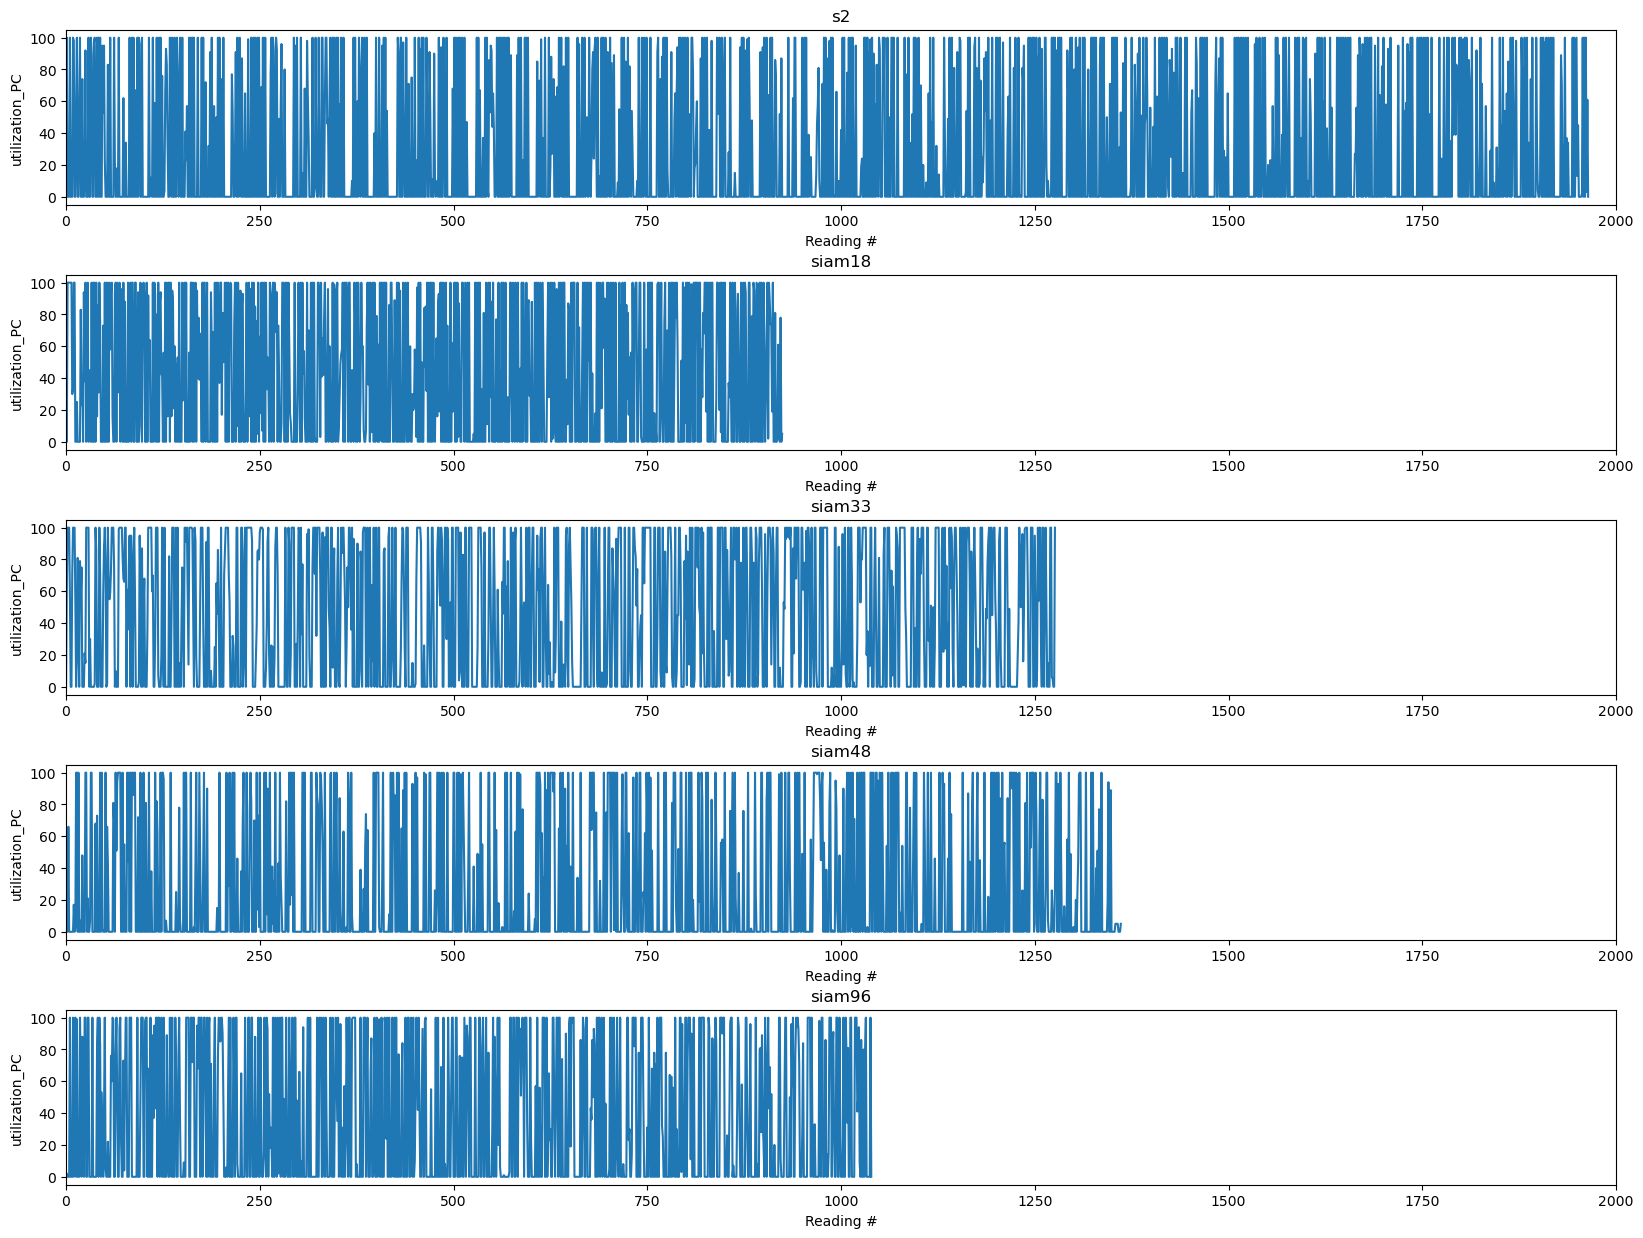

In [84]:
# max length
plot_metrics(cleaned_dfs, sub_titles, 'utilization_PC', 2000)

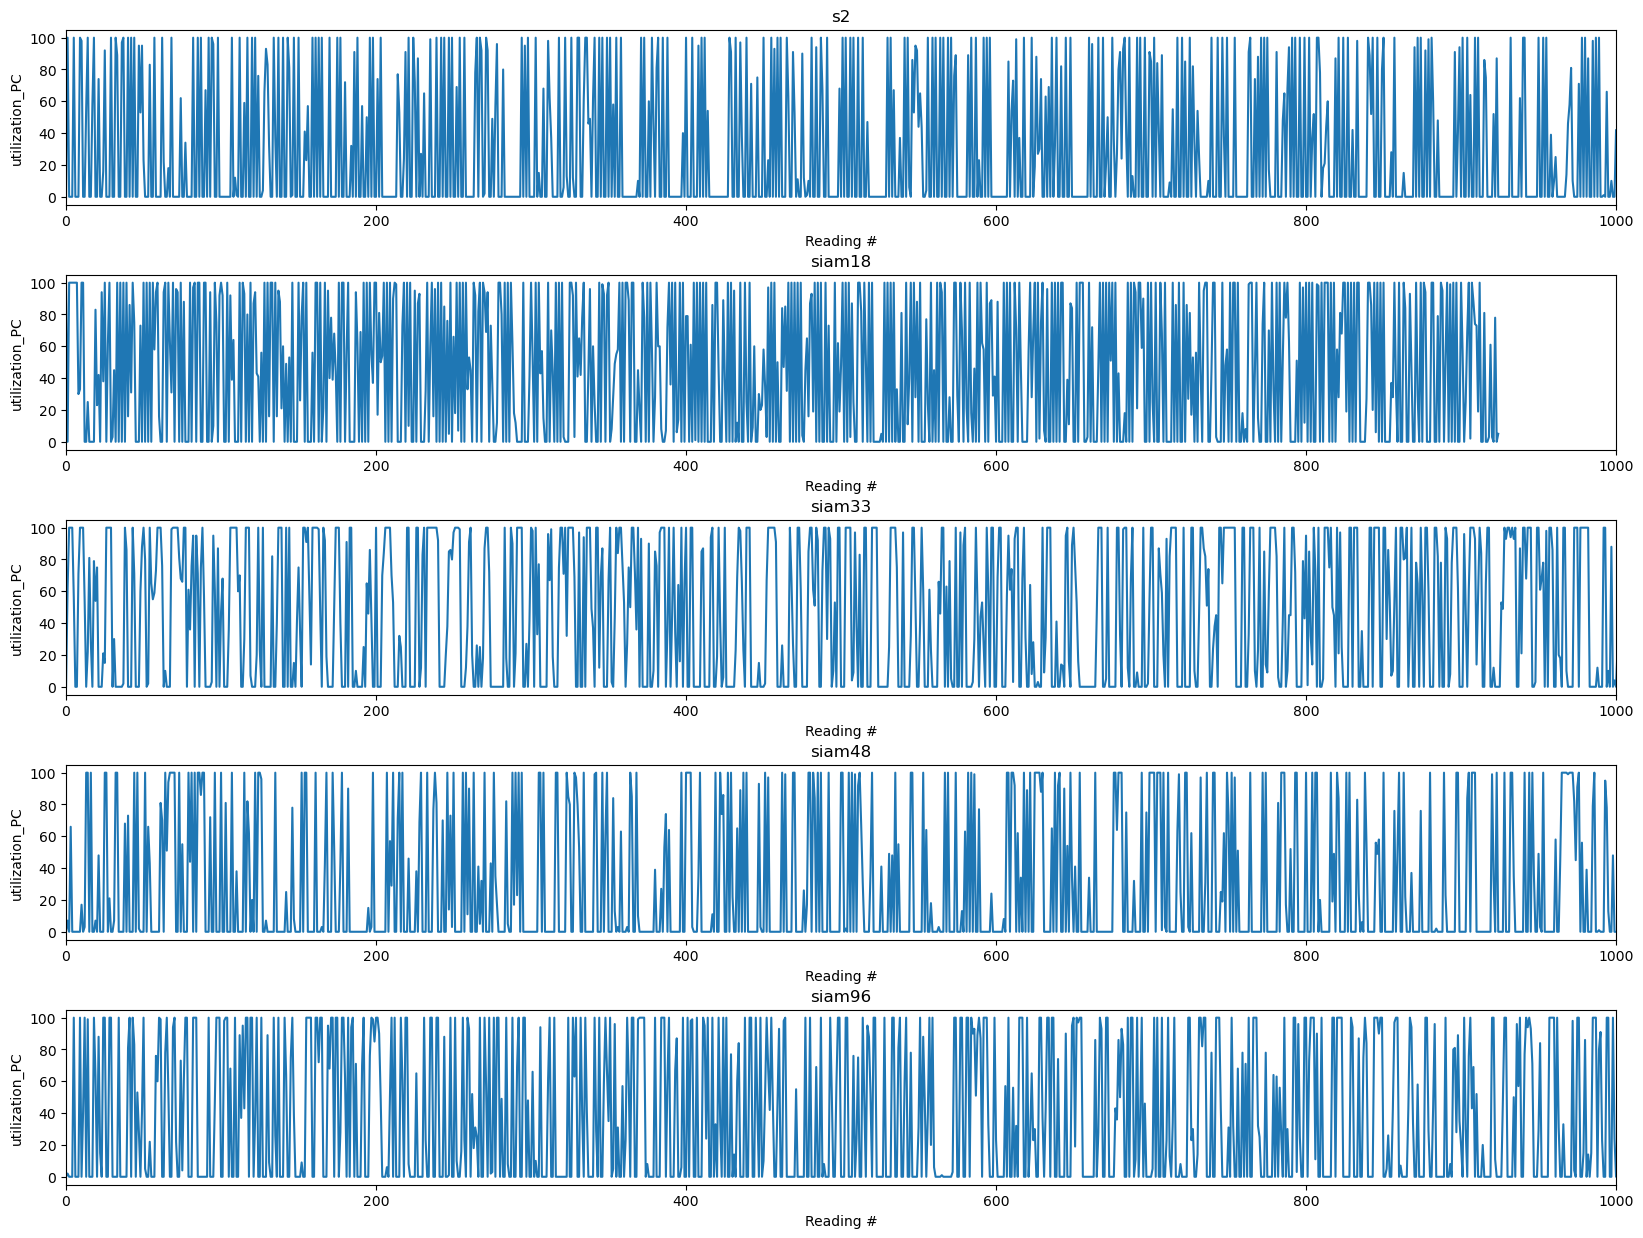

In [82]:
# first 1000 readings
plot_metrics(cleaned_dfs, sub_titles, 'utilization_PC', 1000)

### Temperature

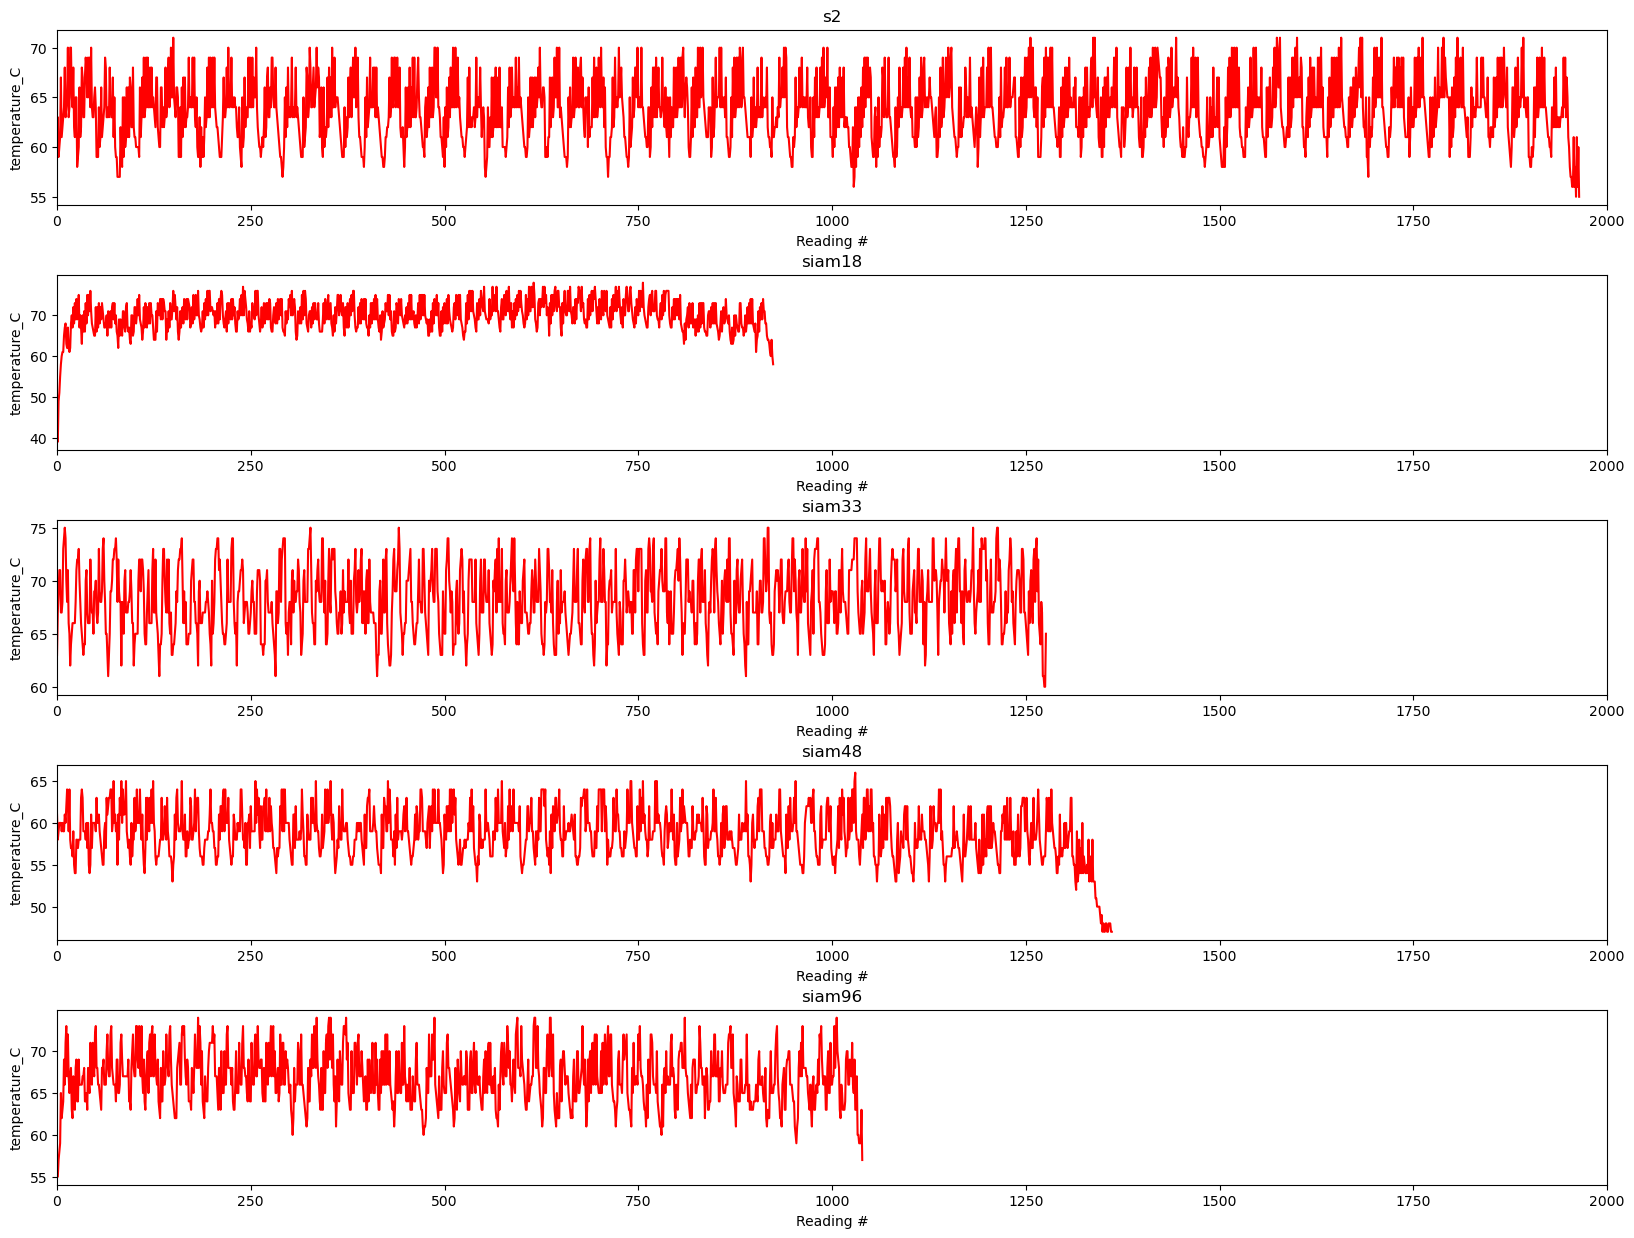

In [89]:
# max length
plot_metrics(cleaned_dfs, sub_titles, 'temperature_C', 2000, 'red')

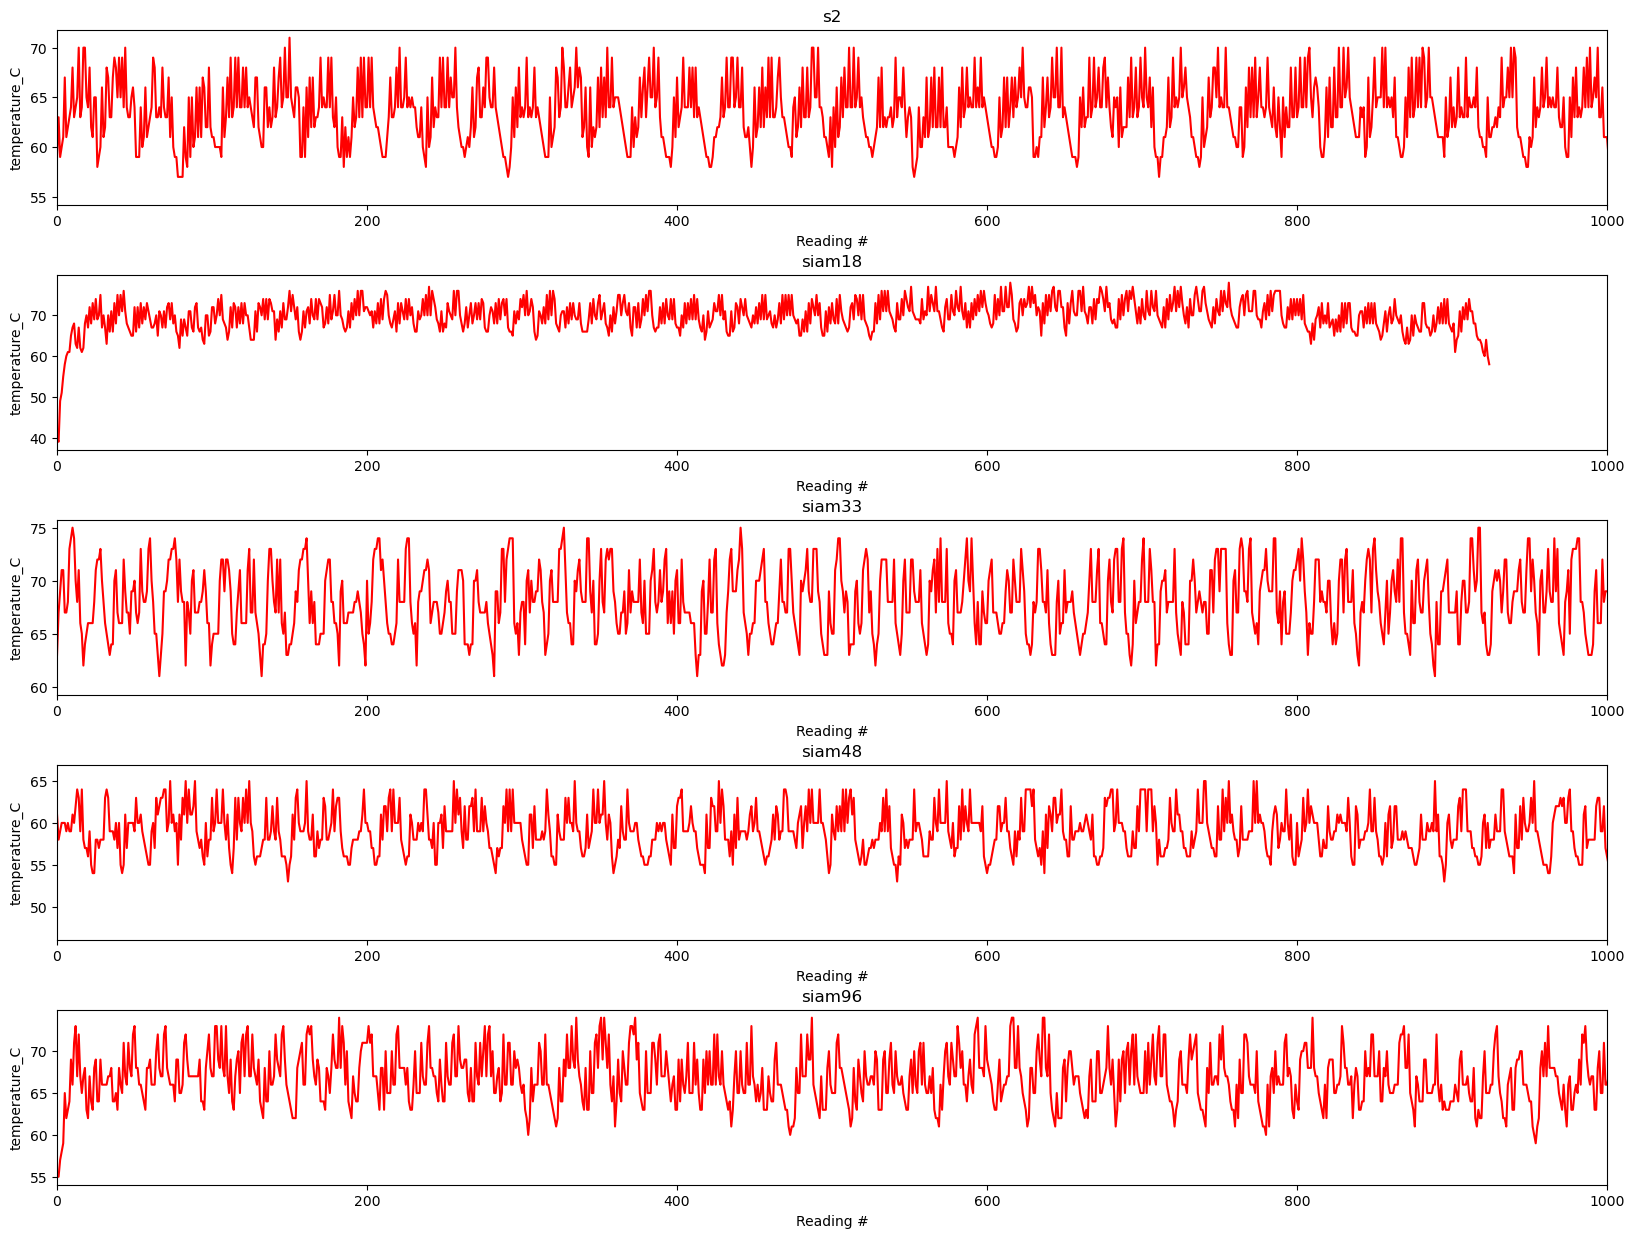

In [90]:
# first 1000 readings
plot_metrics(cleaned_dfs, sub_titles, 'temperature_C', 1000, 'red')

### Power Consumption

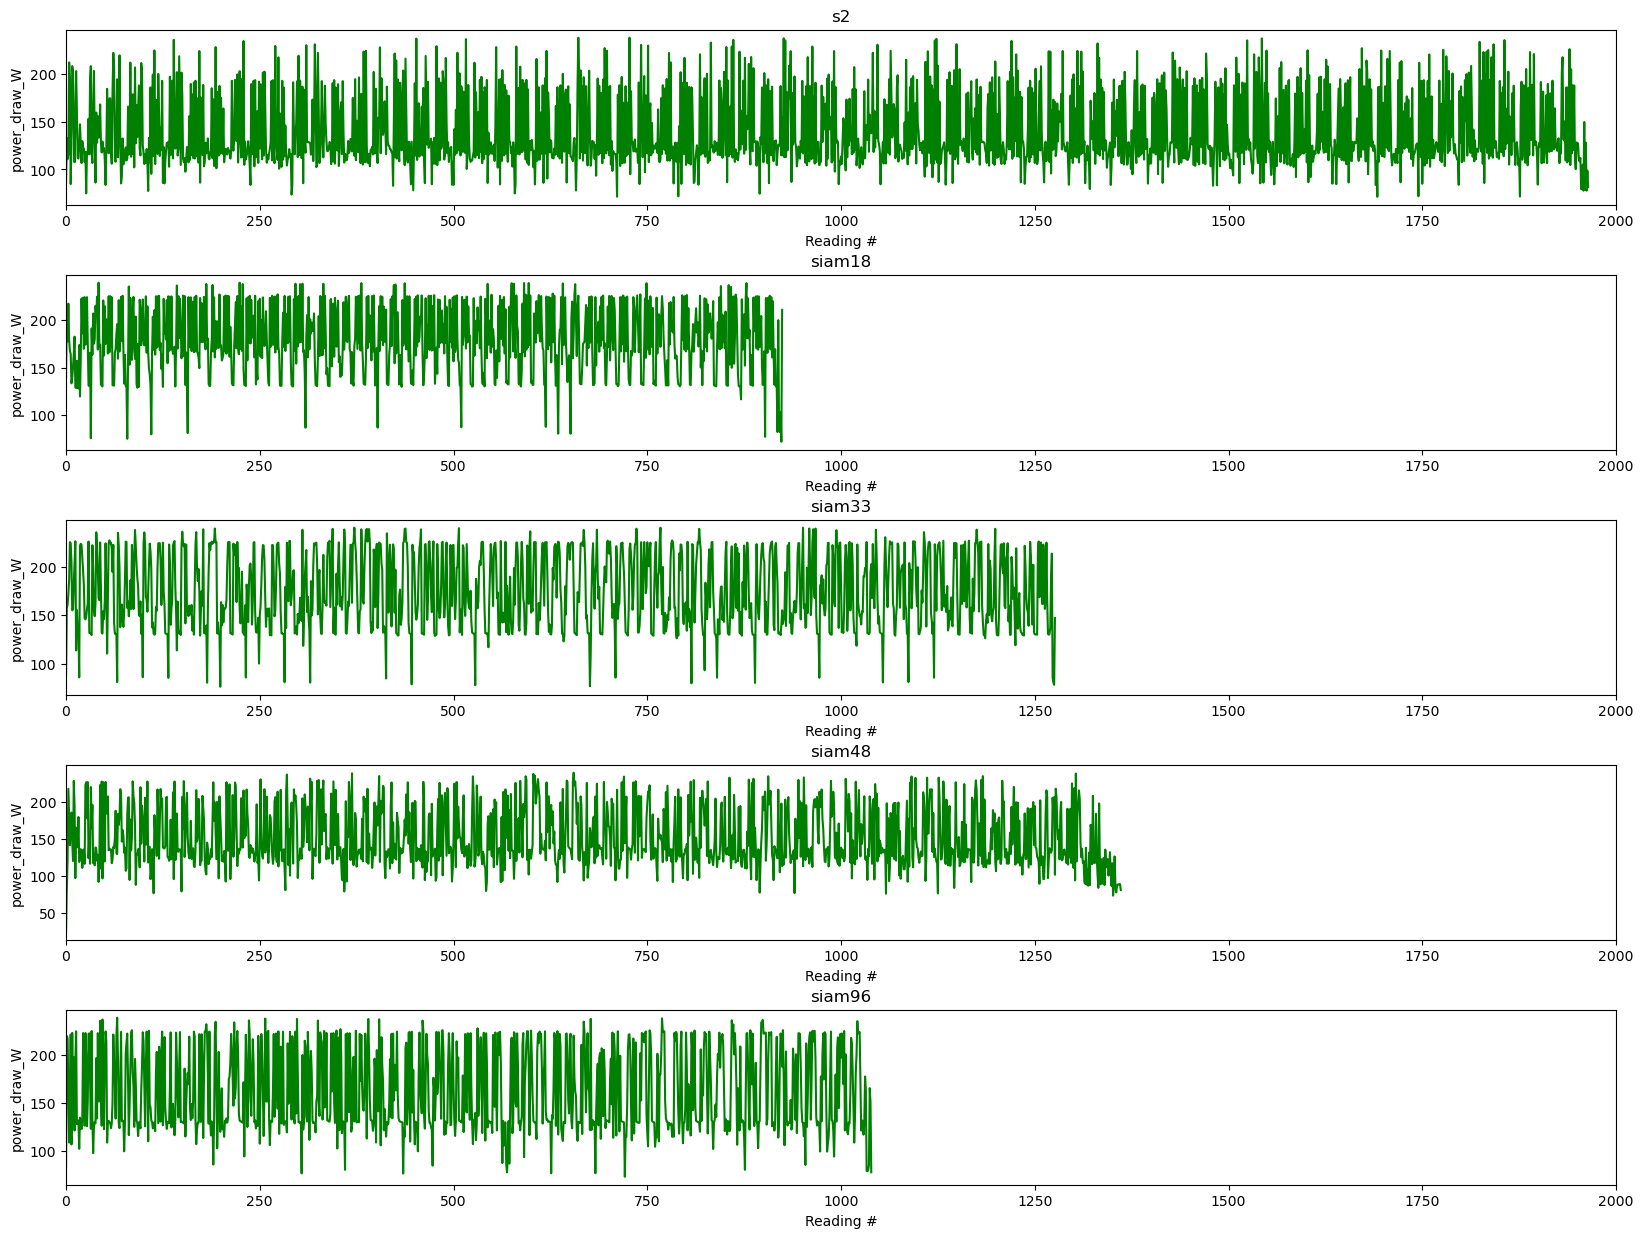

In [94]:
# max length
plot_metrics(cleaned_dfs, sub_titles, 'power_draw_W', 2000, 'green')

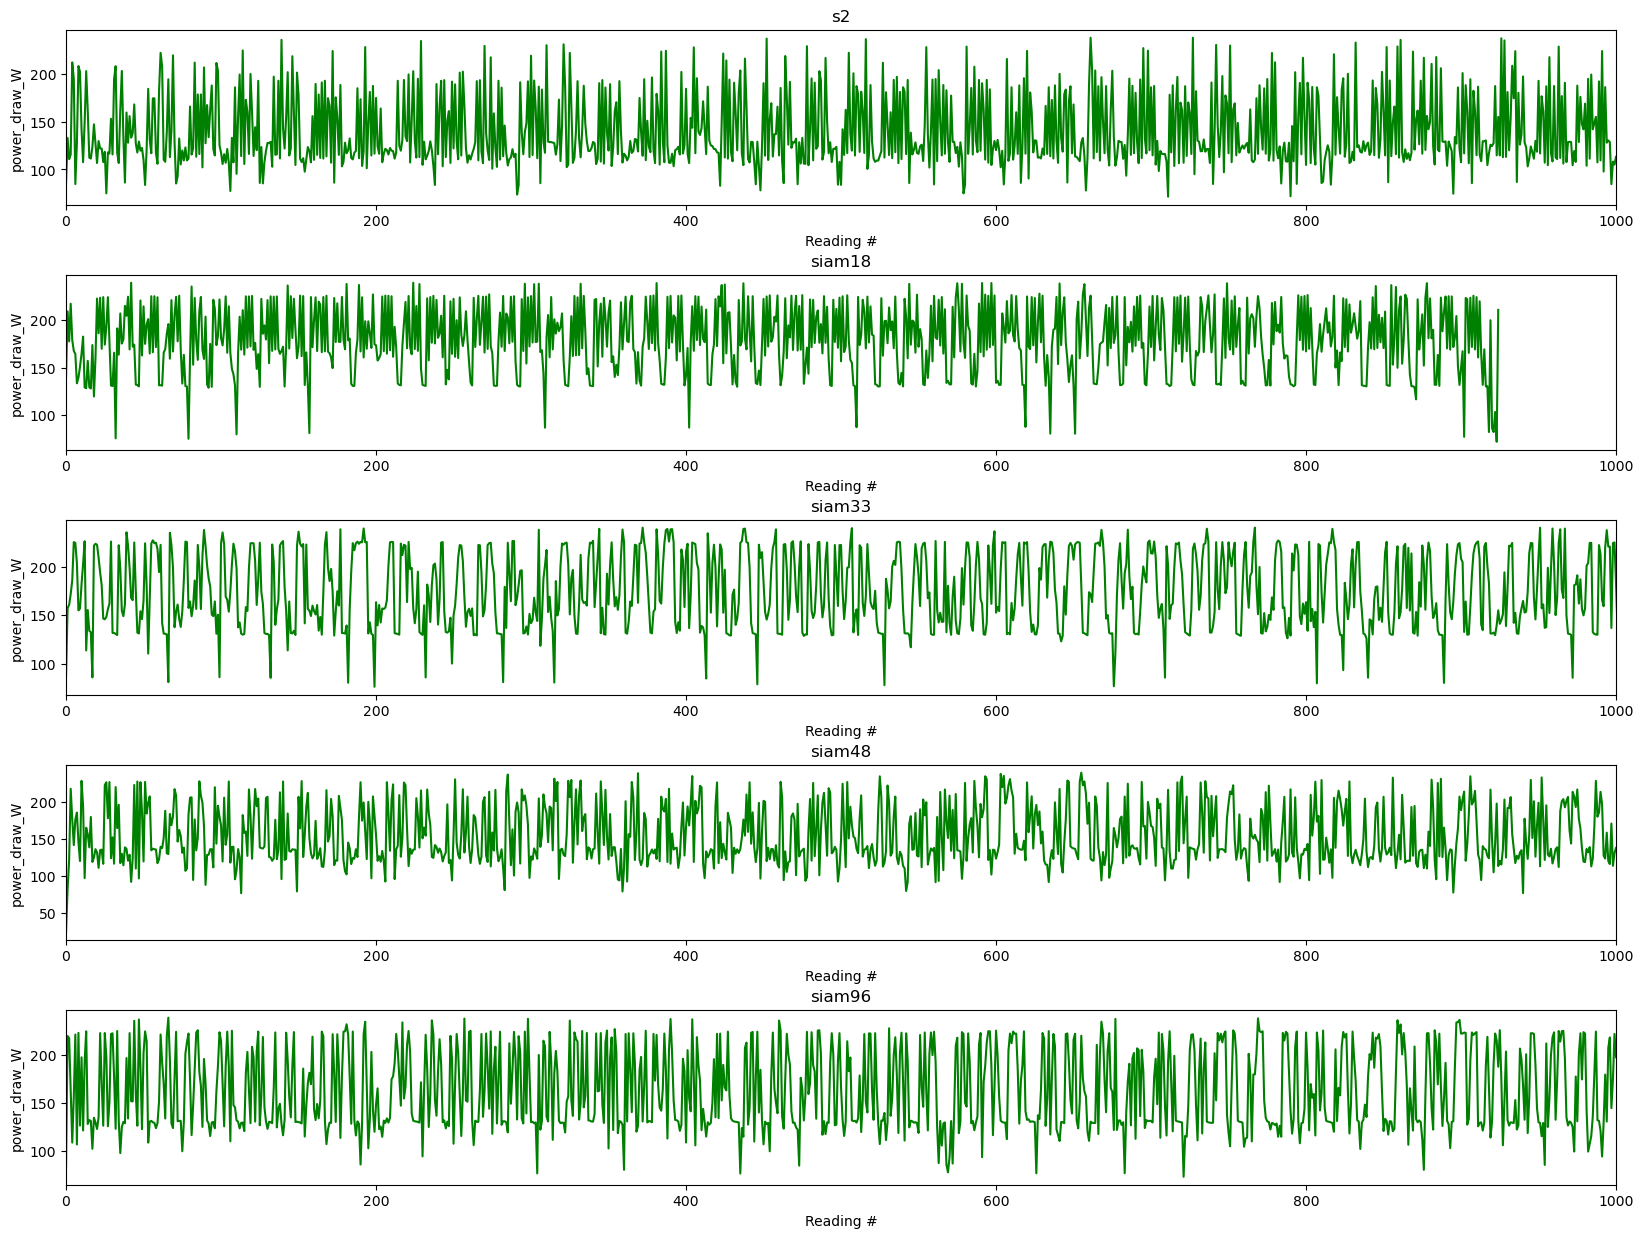

In [95]:
# first 1000 readings
plot_metrics(cleaned_dfs, sub_titles, 'power_draw_W', 1000, 'green')